In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

In [4]:
# Split the dataset into training and testing sets
split_ratio = 0.7
split_idx = int(len(X) * split_ratio)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

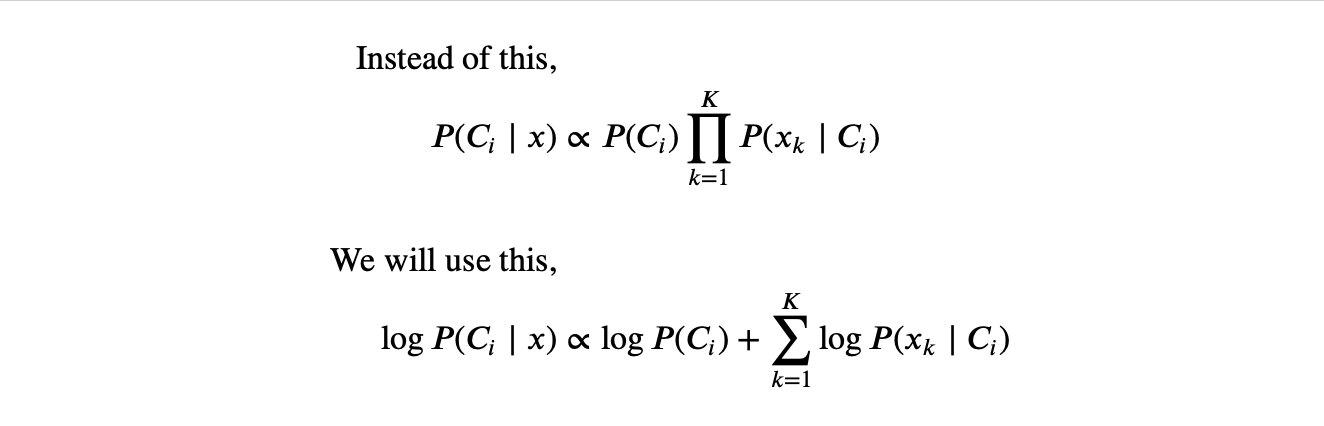

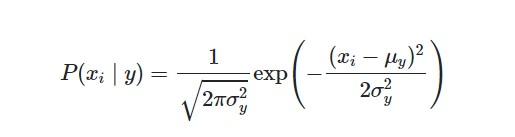

In [5]:
class BayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.std = {}
        self.prior = {}
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.std[c] = np.std(X_c, axis=0)
            self.prior[c] = len(X_c) / len(X)

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.prior[c])
                likelihood = np.sum(np.log(self.normal_pdf(x, self.mean[c], self.std[c])))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred.append(np.argmax(posteriors))
        return y_pred

    def normal_pdf(self, x, mean, std):
        return np.exp(-0.5*((x - mean) / std)**2) / (std * np.sqrt(2*np.pi))

In [6]:
# Fit the model
model = BayesClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777
